In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("avo.tsv",sep="\t")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.shape

(18249, 14)

We have 18249 rows and 14 columns in df dataset

In [4]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

in Df dataset we have integer,float,string data present. We need to apply encoding here

In [5]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

We dont have any null values present in our dataset

In [6]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

These are the total columns present in df dataset,where "AveragePrice" is our first target column and we will use LinearRegression here. And "region" is our second target,where we have classification problem.

In [7]:
df["AveragePrice"].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

These are the total values present in our first target column "AveragePrice"

In [8]:
df["region"].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [9]:
df["region"].value_counts()

Roanoke                338
Northeast              338
TotalUS                338
Seattle                338
NewYork                338
Pittsburgh             338
Southeast              338
RichmondNorfolk        338
Denver                 338
DallasFtWorth          338
Charlotte              338
Jacksonville           338
Boise                  338
HarrisburgScranton     338
Houston                338
Midsouth               338
Columbus               338
Syracuse               338
Louisville             338
West                   338
SouthCentral           338
Spokane                338
HartfordSpringfield    338
SouthCarolina          338
MiamiFtLauderdale      338
BaltimoreWashington    338
NewOrleansMobile       338
Sacramento             338
California             338
SanDiego               338
Albany                 338
RaleighGreensboro      338
LasVegas               338
BuffaloRochester       338
Detroit                338
GrandRapids            338
Indianapolis           338
O

These are the total values present in "region" column,class imbalanced issue is not present here

# APPLYING ENCODING

In [10]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [11]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,150.0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0
1,1,111.0,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0
2,2,72.0,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0
3,3,33.0,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0
4,4,160.0,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,17.0,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018,53.0
18245,8,151.0,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018,53.0
18246,9,112.0,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018,53.0
18247,10,73.0,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,53.0


In [12]:
df.describe()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,24.232232,83.999233,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644
std,15.481045,48.787516,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,0.000000,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000
25%,10.000000,42.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000
50%,24.000000,84.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000
75%,38.000000,126.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000
max,52.000000,168.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000


Here is the statistical summary of df dataset

Key observation:
 
 1. The mean higher than the median(50th percentile) in columns 'Total Volume','4770','Large Bags','XLarge Bags','type',skewness might be present in these columns
 2. we observe huge difference between the 75th percentile and max in column 'XLarge Bags',outliers can be present in the column

# DATA VISUALIZATION 

to check the null values

<AxesSubplot:>

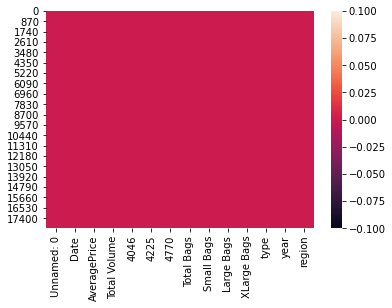

In [13]:
sns.heatmap(df.isnull())

No missing values are present in df dataset

# To check the correlation

In [14]:
cor=df.corr()
cor

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Unnamed: 0,1.000000,-0.112067,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.000288,-0.171667,-0.000489
Date,-0.112067,1.000000,0.031112,-0.010463,-0.010815,-0.013020,-0.009778,-0.005807,-0.004650,-0.009220,-0.000466,-0.000016,-0.004266,-0.000027
AveragePrice,-0.133008,0.031112,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
Total Volume,0.014035,-0.010463,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176
4046,0.017628,-0.010815,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
4225,0.019829,-0.013020,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
4770,0.041752,-0.009778,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Total Bags,-0.002219,-0.005807,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256
Small Bags,0.000347,-0.004650,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large Bags,-0.009196,-0.009220,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768


<AxesSubplot:>

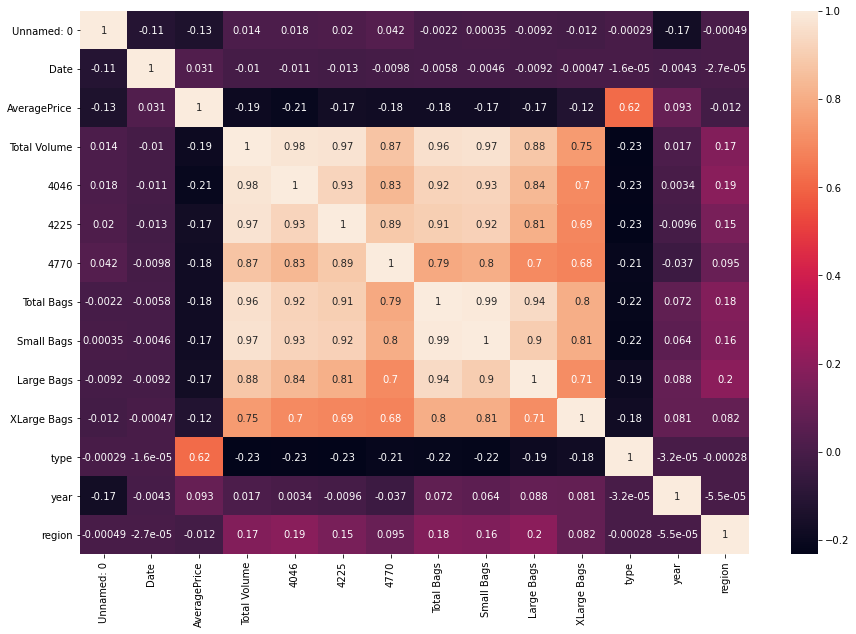

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True)

Observation:
    columns 'Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags' are negatively correated with our first target variable "AveragePrice".
    
    whereas columns 'Unnamed: 0','Date','type','year' are negatively correated with our second target variable "region"

In [16]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

# TO CHECK THE DISTRIBUTION OF DATA IN COLUMNS

### univariate analysis

<AxesSubplot:xlabel='region', ylabel='count'>

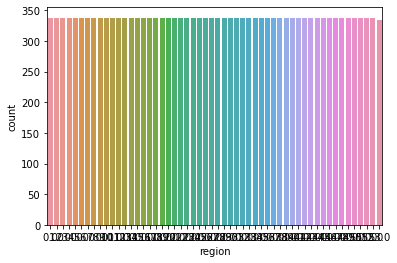

In [17]:
sns.countplot(df["region"])

Datas are equally distributed in "region" column

In [18]:
#Distplot

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

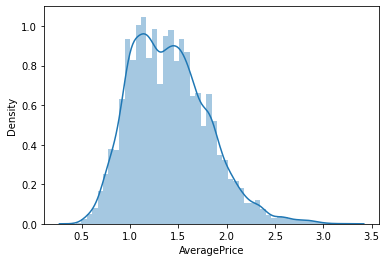

In [19]:
sns.distplot(df['AveragePrice'])

Datas are equally distributed in "AveragePrice " column

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

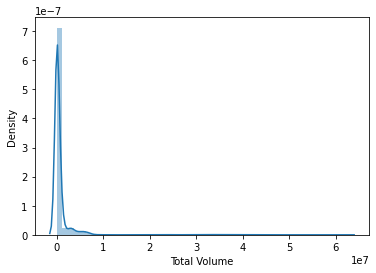

In [20]:
sns.distplot(df['Total Volume'])

Skewness is present in the column "Total Volume"

<AxesSubplot:xlabel='4046', ylabel='Density'>

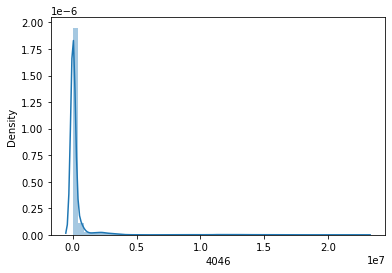

In [21]:
sns.distplot(df['4046'])

Skewness is present in "4046" column

<AxesSubplot:xlabel='4225', ylabel='Density'>

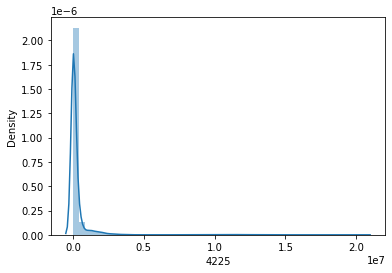

In [22]:
sns.distplot(df['4225'])

Skewness is present in "4225" column

<AxesSubplot:xlabel='4770', ylabel='Density'>

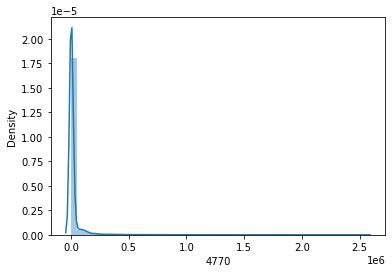

In [23]:
sns.distplot(df['4770'])

Skewness is present in "4770" column

<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

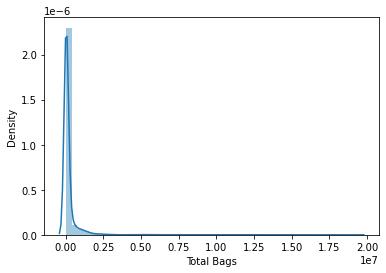

In [24]:
sns.distplot(df['Total Bags'])

Skewness is present in "Total Bags" column

<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

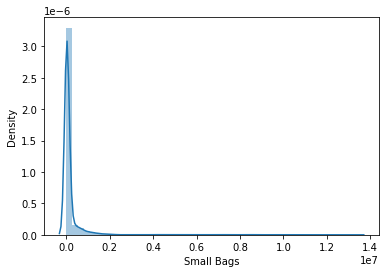

In [25]:
sns.distplot(df['Small Bags'])

Skewness is present in "Small Bags" column

<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

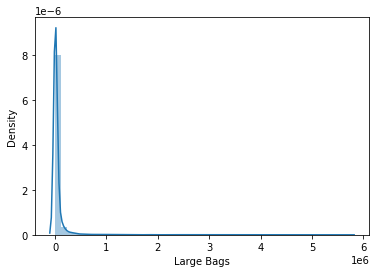

In [26]:
sns.distplot(df['Large Bags'])

Skewness is present in "Large Bags" column

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

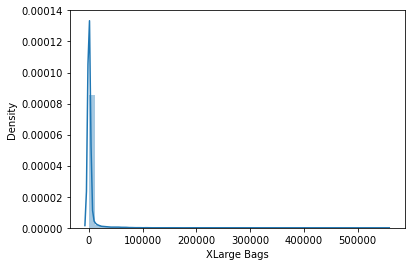

In [27]:
sns.distplot(df['XLarge Bags'])

Skewness is present in "XLarge Bags" column

<AxesSubplot:xlabel='region', ylabel='Density'>

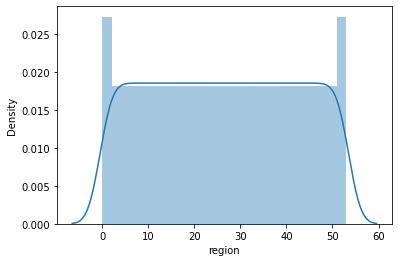

In [28]:
sns.distplot(df['region'])

datas are equally distributed in "region" column

# TO CHECK THE RELATION OF EACH COLUMN TARGET VARIABLE

### BIVARIATE ANALYSIS

<AxesSubplot:xlabel='Total Volume', ylabel='AveragePrice'>

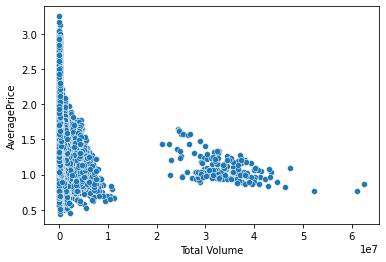

In [29]:
sns.scatterplot(x="Total Volume",y="AveragePrice",data=df)

High Data spread is 0 to 1,and very less has appeared from 2.5 to 6

<AxesSubplot:xlabel='4046', ylabel='AveragePrice'>

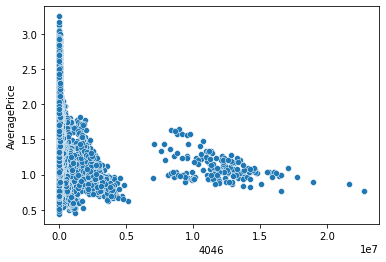

In [30]:
sns.scatterplot(x="4046",y="AveragePrice",data=df)

High Data spread is 0 to 0.5,and very less has appeared from 1.0 to 2.0

<AxesSubplot:xlabel='4225', ylabel='AveragePrice'>

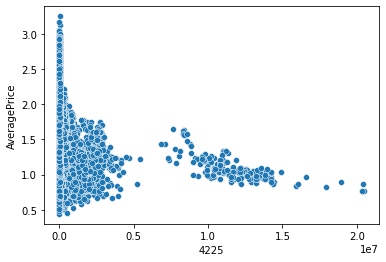

In [31]:
sns.scatterplot(x="4225",y="AveragePrice",data=df)

High Data spread is 0 to 0.5,and very less has appeared from 1.0 to 2.0

<AxesSubplot:xlabel='4770', ylabel='AveragePrice'>

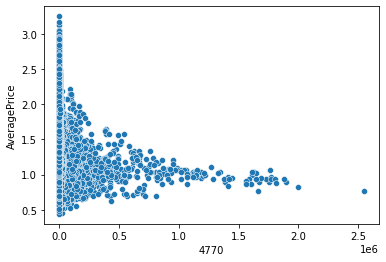

In [32]:
sns.scatterplot(x="4770",y="AveragePrice",data=df)

High Data spread is 0 to 0.5,and very less has appeared from 1.0 to 2.5

<AxesSubplot:xlabel='Total Bags', ylabel='AveragePrice'>

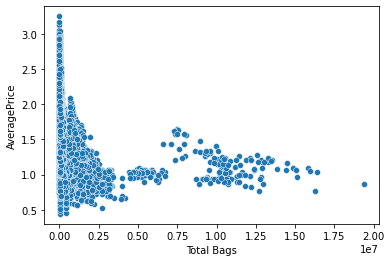

In [33]:
sns.scatterplot(x="Total Bags",y="AveragePrice",data=df)

High Data spread is 0 to 0.5,and very less has appeared from 1.0 to 2.00

<AxesSubplot:xlabel='Small Bags', ylabel='AveragePrice'>

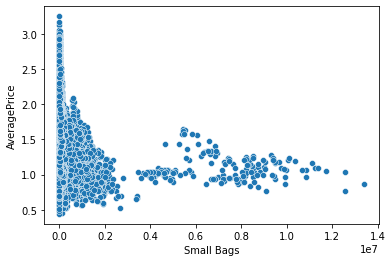

In [34]:
sns.scatterplot(x="Small Bags",y="AveragePrice",data=df)

High Data spread is 0 to 0.2,and very less has appeared from 0.4 to 1.4

<AxesSubplot:xlabel='Large Bags', ylabel='AveragePrice'>

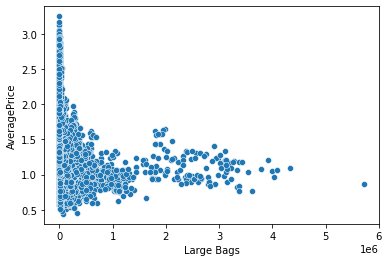

In [35]:
sns.scatterplot(x="Large Bags",y="AveragePrice",data=df)

High Data spread is 0 to 1,and very less has appeared from 2.5 to 4

<AxesSubplot:xlabel='XLarge Bags', ylabel='AveragePrice'>

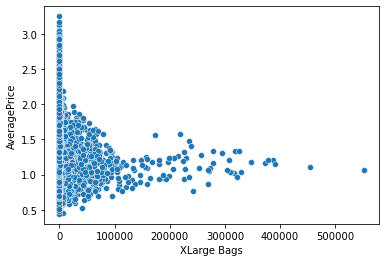

In [36]:
sns.scatterplot(x="XLarge Bags",y="AveragePrice",data=df)

High Data spread is 0 to 100000,and very less has appeared from 200000 to 40000

### CHECKING THE RELATION WITH OUR SECOND TARGET VARIABLE

<AxesSubplot:xlabel='Total Volume', ylabel='region'>

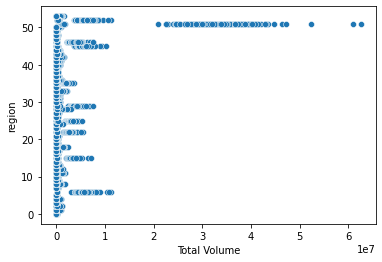

In [37]:
sns.scatterplot(x="Total Volume",y="region",data=df)

Mostly the data spread is between 0 to 1,few times it has appeared from the count of 2 to 4.5

<AxesSubplot:xlabel='4046', ylabel='region'>

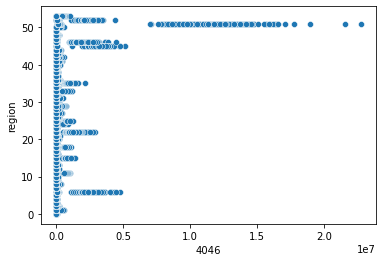

In [38]:
sns.scatterplot(x="4046",y="region",data=df)

Mostly the data spread is between 0 to 0.5,few times it has appeared from the count of 1 to 2

<AxesSubplot:xlabel='4225', ylabel='region'>

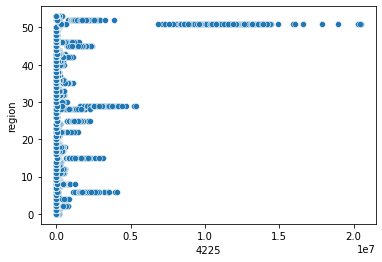

In [39]:
sns.scatterplot(x="4225",y="region",data=df)

Mostly the data spread is between 0 to 0.5,few times it has appeared from the count of 0.5 to 2.0

<AxesSubplot:xlabel='4770', ylabel='region'>

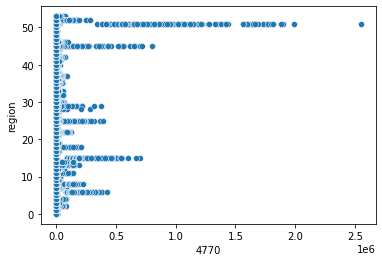

In [40]:
sns.scatterplot(x="4770",y="region",data=df)

Mostly the data spread is between 0 to 0.5,few times it has appeared from the count of 1 to 2

<AxesSubplot:xlabel='Total Bags', ylabel='region'>

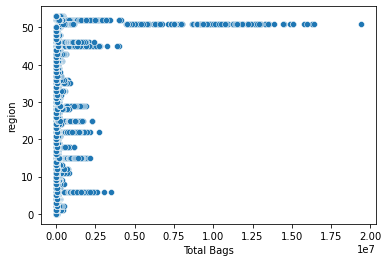

In [41]:
sns.scatterplot(x="Total Bags",y="region",data=df)

Mostly the data spread is between 0 to 0.5,few times it has appeared from the count of 1 to 1.50

<AxesSubplot:xlabel='XLarge Bags', ylabel='region'>

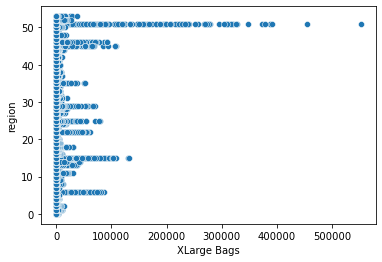

In [42]:
sns.scatterplot(x="XLarge Bags",y="region",data=df)

Mostly the data spread is between 0 to 100000,few times it has appeared from the count of 200000 to 400000

# PLOTTING OUTLIERS

### UNVARIATE ANALYSIS

<AxesSubplot:>

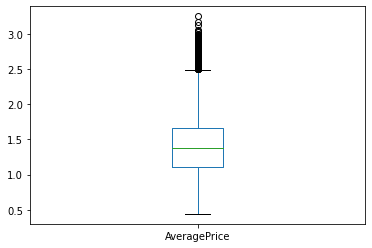

In [43]:
df["AveragePrice"].plot.box()

outliers are present in the column

<AxesSubplot:>

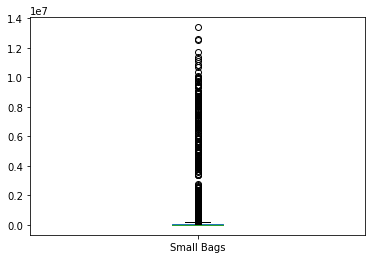

In [44]:
df["Small Bags"].plot.box()

Extreme outliers are present in the column

<AxesSubplot:>

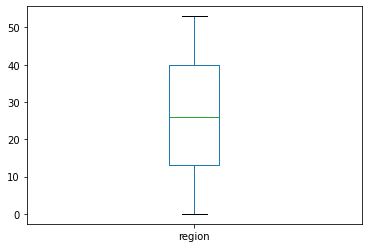

In [45]:
df["region"].plot.box()

outliers are not present in the column

### BIVARIATE ANALYSIS

Unnamed: 0         AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Date            AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
AveragePrice    AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Total Volume    AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
4046            AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
4225            AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
4770            AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Total Bags            AxesSubplot(0.125,0.125;0.0945122x0.343182)
Small Bags         AxesSubplot(0.238415,0.125;0.0945122x0.343182)
Large Bags         AxesSubplot(0.351829,0.125;0.0945122x0.343182)
XLarge Bags        AxesSubplot(0.465244,0.125;0.0945122x0.343182)
type               AxesSubplot(0.578659,0.125;0.0945122x0.343182)
year               AxesSubplot(0.692073,0.125;0.0945122x0.343182)
region             AxesSubplot(0.805488,0.125;0.0945122x0.343182)
dtype: object

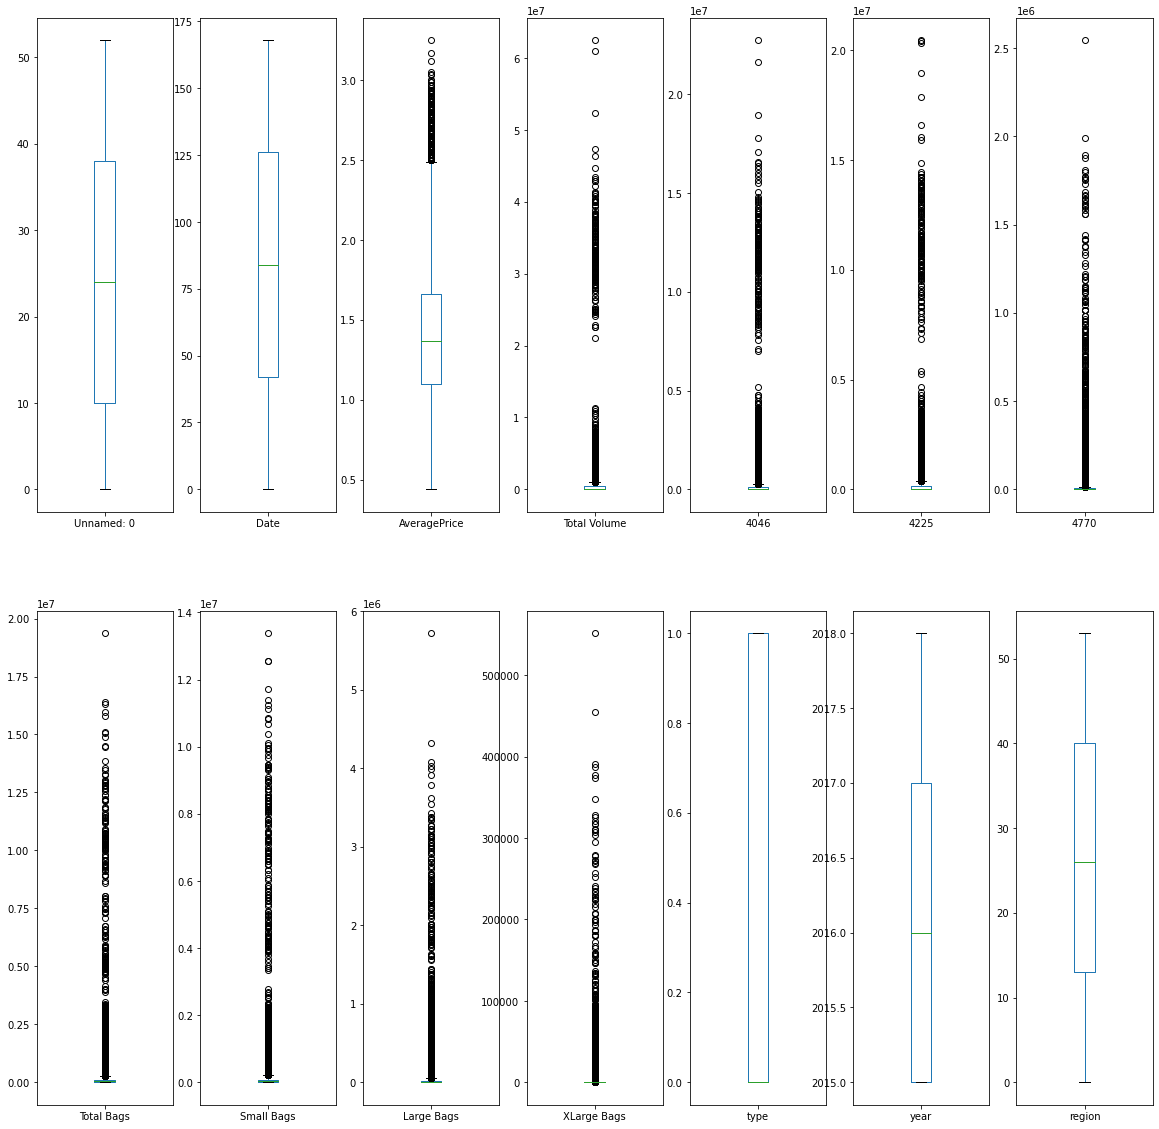

In [46]:
df.plot(kind="box",subplots=True,layout=(2,7),figsize=(20,20))    

OBSERVATION:
    
    We have outliers present in "AveragePrice",'Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags'

As depending on the correlation wuth target variable and the outliers present in the dataset we need to drop 'XLarge Bags','4770','4046' these columns

In [47]:
df.drop(['XLarge Bags','4770','4046'],axis=1,inplace=True)

In [48]:
df.shape

(18249, 11)

Dropped columns are no longer present in the dataset

# REMOVING OUTLIERS

In [49]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.5653269 , 1.35285788, 0.18868864, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       [1.50073001, 0.55345115, 0.13901962, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       [1.43613312, 0.24595558, 1.18206895, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       ...,
       [0.98395486, 0.57394876, 1.15237477, ..., 1.00016441, 1.97050371,
        1.70081131],
       [0.91935797, 0.22545797, 1.30138182, ..., 1.00016441, 1.97050371,
        1.70081131],
       [0.85476108, 1.0248647 , 0.53151208, ..., 1.00016441, 1.97050371,
        1.70081131]])

In [50]:
threshold=3
print(np.where(z>3))

(array([ 1516,  1518,  1541, ..., 17304, 17402, 17428], dtype=int64), array([4, 4, 4, ..., 2, 2, 2], dtype=int64))


In [51]:
df_new=df[(z<3).all(axis=1)]
df_new

,Unnamed: 0,Date,AveragePrice,Total Volume,4225,Total Bags,Small Bags,Large Bags,type,year,region
0,0,150.0,1.33,64236.62,54454.85,8696.87,8603.62,93.25,0.0,2015,0.0
1,1,111.0,1.35,54876.98,44638.81,9505.56,9408.07,97.49,0.0,2015,0.0
2,2,72.0,0.93,118220.22,109149.67,8145.35,8042.21,103.14,0.0,2015,0.0
3,3,33.0,1.08,78992.15,71976.41,5811.16,5677.40,133.76,0.0,2015,0.0
4,4,160.0,1.28,51039.60,43838.39,6183.95,5986.26,197.69,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...
18244,7,17.0,1.63,17074.83,1529.20,13498.67,13066.82,431.85,1.0,2018,53.0
18245,8,151.0,1.71,13888.04,3431.50,9264.84,8940.04,324.80,1.0,2018,53.0
18246,9,112.0,1.87,13766.76,2452.79,9394.11,9351.80,42.31,1.0,2018,53.0
18247,10,73.0,1.93,16205.22,2981.04,10969.54,10919.54,50.00,1.0,2018,53.0


In [52]:
df.shape

(18249, 11)

In [53]:
df_new.shape

(17830, 11)

In [54]:
(419/18249)

0.02296016220066853

We have lost 0.02% data so far by removing outliers

In [55]:
df=df_new
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4225,Total Bags,Small Bags,Large Bags,type,year,region
0,0,150.0,1.33,64236.62,54454.85,8696.87,8603.62,93.25,0.0,2015,0.0
1,1,111.0,1.35,54876.98,44638.81,9505.56,9408.07,97.49,0.0,2015,0.0
2,2,72.0,0.93,118220.22,109149.67,8145.35,8042.21,103.14,0.0,2015,0.0
3,3,33.0,1.08,78992.15,71976.41,5811.16,5677.40,133.76,0.0,2015,0.0
4,4,160.0,1.28,51039.60,43838.39,6183.95,5986.26,197.69,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...
18244,7,17.0,1.63,17074.83,1529.20,13498.67,13066.82,431.85,1.0,2018,53.0
18245,8,151.0,1.71,13888.04,3431.50,9264.84,8940.04,324.80,1.0,2018,53.0
18246,9,112.0,1.87,13766.76,2452.79,9394.11,9351.80,42.31,1.0,2018,53.0
18247,10,73.0,1.93,16205.22,2981.04,10969.54,10919.54,50.00,1.0,2018,53.0


# DIVIDING THE COLUMNS AS x AND y

In [56]:
x=df.drop("AveragePrice",axis=1)
y=df["AveragePrice"]

# APPLYING VIF

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
x.shape

(17830, 10)

In [59]:
x.shape[1]

10

In [60]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [61]:
vif_calc()

    VIF FACTOR      features
0     3.522147    Unnamed: 0
1     4.024848          Date
2    14.117875  Total Volume
3     5.559111          4225
4  2830.999650    Total Bags
5  1947.299200    Small Bags
6   163.831897    Large Bags
7     2.463664          type
8    11.761561          year
9     4.026553        region


In [62]:
df.drop(["Date"],axis=1,inplace=True)
df

,Unnamed: 0,AveragePrice,Total Volume,4225,Total Bags,Small Bags,Large Bags,type,year,region
0,0,1.33,64236.62,54454.85,8696.87,8603.62,93.25,0.0,2015,0.0
1,1,1.35,54876.98,44638.81,9505.56,9408.07,97.49,0.0,2015,0.0
2,2,0.93,118220.22,109149.67,8145.35,8042.21,103.14,0.0,2015,0.0
3,3,1.08,78992.15,71976.41,5811.16,5677.40,133.76,0.0,2015,0.0
4,4,1.28,51039.60,43838.39,6183.95,5986.26,197.69,0.0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...
18244,7,1.63,17074.83,1529.20,13498.67,13066.82,431.85,1.0,2018,53.0
18245,8,1.71,13888.04,3431.50,9264.84,8940.04,324.80,1.0,2018,53.0
18246,9,1.87,13766.76,2452.79,9394.11,9351.80,42.31,1.0,2018,53.0
18247,10,1.93,16205.22,2981.04,10969.54,10919.54,50.00,1.0,2018,53.0


Dropped 'Date' column as it was having high correlation with "region"

# REMOVE SKEWNESS

In [63]:
df.skew()

Unnamed: 0      0.103135
AveragePrice    0.385199
Total Volume    3.580187
4225            4.111781
Total Bags      3.848862
Small Bags      4.079555
Large Bags      4.787694
type           -0.017276
year            0.228884
region          0.017996
dtype: float64

In [64]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method="yeo-johnson")

In [65]:
x

array([[-1.96495453e+00,  1.26191352e+00, -8.96776185e-02, ...,
        -1.00867475e+00, -9.20707954e-13, -2.01381549e+00],
       [-1.78993514e+00,  5.95614433e-01, -1.60938538e-01, ...,
        -1.00867475e+00, -9.20707954e-13, -2.01381549e+00],
       [-1.64650242e+00, -1.41820989e-01,  1.87274904e-01, ...,
        -1.00867475e+00, -9.20707954e-13, -2.01381549e+00],
       ...,
       [-9.28605052e-01,  6.13450211e-01, -7.82459403e-01, ...,
         9.91399851e-01,  1.49880108e-12,  1.57749219e+00],
       [-8.45368554e-01, -1.21690100e-01, -7.09557873e-01, ...,
         9.91399851e-01,  1.49880108e-12,  1.57749219e+00],
       [-7.64940176e-01, -9.83493305e-01, -6.75425283e-01, ...,
         9.91399851e-01,  1.49880108e-12,  1.57749219e+00]])

applied power_transform method to remove skewness

# APPLY SCALING

In [66]:
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.96495453,  1.26191352, -0.08967762, ..., -1.00867475,
        -1.21295558, -2.01381549],
       [-1.78993514,  0.59561443, -0.16093854, ..., -1.00867475,
        -1.21295558, -2.01381549],
       [-1.64650242, -0.14182099,  0.1872749 , ..., -1.00867475,
        -1.21295558, -2.01381549],
       ...,
       [-0.92860505,  0.61345021, -0.7824594 , ...,  0.99139985,
         1.97471772,  1.57749219],
       [-0.84536855, -0.1216901 , -0.70955787, ...,  0.99139985,
         1.97471772,  1.57749219],
       [-0.76494018, -0.98349331, -0.67542528, ...,  0.99139985,
         1.97471772,  1.57749219]])

Applied StandardScaler to make all the data even

# APPLYING VARIOUS MODEL

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=3)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# LinearRegression

In [68]:
lr=LinearRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)

lr.score(x_train,y_train)

0.5364113469112203

In [69]:
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print(r2_score(y_test,pred_test))

0.5366249901488576


# KNeighborsRegressor

In [70]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
pred_test=knr.predict(x_test)
print(r2_score(y_test,pred_test))

0.7689037533186885


# GradientBoostingRegressor

In [71]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred_test=gb.predict(x_test)
print(r2_score(y_test,pred_test))

0.7373516168538281


# DecisionTreeRegressor

In [72]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_test=dtr.predict(x_test)
print(r2_score(y_test,pred_test))

0.7456475778740703


# REGULARIZATION 

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [74]:
from sklearn.linear_model import Lasso 


parameters={"alpha":[.0001,.001,.01,.1,1,10],"random_state":list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [75]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.5366850975257649

# CHECKING THE CROSS VALIDATION SCORE

In [76]:
from sklearn.model_selection import cross_val_score

In [77]:
print(cross_val_score(lr,x,y,cv=5).mean())

0.1870153957616928


In [78]:
print(cross_val_score(knr,x,y,cv=4).mean())

-0.28049031872252767


In [79]:
print(cross_val_score(gb,x,y,cv=4).mean())

0.30921758482463546


In [80]:
print(cross_val_score(dtr,x,y,cv=4).mean())

-0.3288020468516836


In [81]:
print(cross_val_score(ls,x,y,cv=4).mean())

0.13810403085328476


GradientBoostingRegressor is giving us less difference with cv score 

# ENSEMBLE TECHNIQUE

In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [122]:
rf=RandomForestRegressor(criterion="mse",max_features="sqrt")

rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_rf=rf.predict(x_test)

rfs=r2_score(y_test,pred_rf)
print('R2_score:',rfs*100)


rfc=(cross_val_score(rf,x,y,cv=5).mean())
print("cross_val_score:",rfc*100)

R2_score: 87.51097028621253
cross_val_score: 21.92097403348124


# SAVING THE BEST MODEL

In [123]:
import joblib
joblib.dump(gb,"best_gbfile1.obj")

['best_gbfile1.obj']

### APPROACHING TOWARDS OUR SECOND MODEL

In [82]:
df.columns

Index(['Unnamed: 0', 'AveragePrice', 'Total Volume', '4225', 'Total Bags',
       'Small Bags', 'Large Bags', 'type', 'year', 'region'],
      dtype='object')

# SEPARATING THE COLUMNS AS dfx & dfy

In [83]:
dfx=df.drop("region",axis=1)
dfy=df["region"]

# APPLYING VARIOUS MODEL

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
lg=LogisticRegression()
from sklearn.metrics import accuracy_score 

In [91]:
train_dfx,test_dfx,train_dfy,test_dfy=train_test_split(dfx,dfy,test_size=0.20,random_state=11)

In [92]:
from sklearn.metrics import classification_report

# LogisticRegression

In [93]:
lg=LogisticRegression()
lg.fit(train_dfx,train_dfy)
pred=lg.predict(test_dfx)
acc=classification_report(test_dfy,pred)
print(acc)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        82
         1.0       0.08      0.03      0.05        60
         2.0       0.17      0.38      0.24        69
         3.0       0.00      0.00      0.00        60
         4.0       0.15      0.11      0.12        66
         5.0       0.19      0.05      0.07        64
         6.0       0.11      0.42      0.17        64
         7.0       0.00      0.00      0.00        79
         8.0       0.21      0.48      0.29        63
         9.0       0.11      0.31      0.16        68
        10.0       0.00      0.00      0.00        66
        11.0       0.00      0.00      0.00        70
        12.0       0.08      0.37      0.14        62
        13.0       0.14      0.09      0.11        69
        14.0       0.00      0.00      0.00        72
        15.0       0.36      0.47      0.41        75
        16.0       0.00      0.00      0.00        68
        17.0       0.00    

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 

# DecisionTreeClassifier

In [97]:
dtc=DecisionTreeClassifier()
dtc.fit(train_dfx,train_dfy)
pred=dtc.predict(test_dfx)
acc=classification_report(test_dfy,pred)
print(acc)

              precision    recall  f1-score   support

         0.0       0.82      0.87      0.84        82
         1.0       0.52      0.53      0.52        60
         2.0       0.74      0.80      0.77        69
         3.0       0.69      0.68      0.69        60
         4.0       0.78      0.82      0.80        66
         5.0       0.71      0.72      0.71        64
         6.0       0.89      0.88      0.88        64
         7.0       0.63      0.68      0.65        79
         8.0       0.75      0.76      0.76        63
         9.0       0.68      0.75      0.71        68
        10.0       0.53      0.50      0.52        66
        11.0       0.78      0.73      0.76        70
        12.0       0.67      0.65      0.66        62
        13.0       0.53      0.54      0.53        69
        14.0       0.81      0.58      0.68        72
        15.0       0.81      0.75      0.78        75
        16.0       0.61      0.62      0.61        68
        17.0       0.71    

# RandomForestClassifier

In [99]:
rfc=RandomForestClassifier()
rfc.fit(train_dfx,train_dfy)
pred=rfc.predict(test_dfx)
acc=classification_report(test_dfy,pred)
print(acc)

              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90        82
         1.0       0.82      0.75      0.78        60
         2.0       0.84      0.88      0.86        69
         3.0       0.84      0.87      0.85        60
         4.0       0.95      0.89      0.92        66
         5.0       0.75      0.73      0.74        64
         6.0       0.92      0.95      0.94        64
         7.0       0.70      0.86      0.77        79
         8.0       0.86      0.89      0.88        63
         9.0       0.69      0.87      0.77        68
        10.0       0.67      0.58      0.62        66
        11.0       0.91      0.90      0.91        70
        12.0       0.82      0.85      0.83        62
        13.0       0.76      0.64      0.69        69
        14.0       0.90      0.86      0.88        72
        15.0       0.91      0.81      0.86        75
        16.0       0.77      0.72      0.74        68
        17.0       0.77    

# KNeighborsClassifier

In [100]:
knn=KNeighborsClassifier()
knn.fit(train_dfx,train_dfy)
pred=knn.predict(test_dfx)
acc=classification_report(test_dfy,pred)
print(acc)

              precision    recall  f1-score   support

         0.0       0.59      0.77      0.67        82
         1.0       0.58      0.63      0.60        60
         2.0       0.65      0.75      0.70        69
         3.0       0.61      0.72      0.66        60
         4.0       0.71      0.82      0.76        66
         5.0       0.45      0.45      0.45        64
         6.0       0.67      0.80      0.73        64
         7.0       0.44      0.65      0.52        79
         8.0       0.63      0.75      0.68        63
         9.0       0.58      0.72      0.64        68
        10.0       0.44      0.48      0.46        66
        11.0       0.63      0.80      0.70        70
        12.0       0.65      0.58      0.62        62
        13.0       0.49      0.52      0.50        69
        14.0       0.56      0.50      0.53        72
        15.0       0.69      0.63      0.66        75
        16.0       0.60      0.53      0.56        68
        17.0       0.48    

# CHECKING THE CROSS VALIDATION SCORE

In [106]:
print(cross_val_score(lg,dfx,dfy,cv=4).mean())

0.09646033937974482


In [107]:
print(cross_val_score(dtc,dfx,dfy,cv=4).mean())

0.36880608713761814


In [108]:
print(cross_val_score(rfc,dfx,dfy,cv=4).mean())

0.4602254728977449


In [109]:
print(cross_val_score(knn,dfx,dfy,cv=4).mean())

0.36252170810596


as we can see rfc has less difference between cv score and accuracy_score,so we will save it as best model

# SAVING THE BEST MODEL

In [114]:
import joblib
joblib.dump(rfc,"best_rfcfile1.obj")

['best_rfcfile1.obj']